In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Binary Classification

40 sampels and 2 classes

In [4]:
data = np.load('/content/Radar_Dataset_300sample_2classes.npy')

In [5]:
data.shape

(300, 180)

In [6]:
df = pd.DataFrame(data)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,18,18,18,17,18,18,18,18,18,18,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,29,0,0,0,0,28,28,29,27,...,0,0,0,0,0,0,0,0,0,0
4,27,27,27,27,27,27,27,27,27,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,20
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.166667,1.116667,0.786667,0.796667,0.793333,0.793333,0.880000,1.133333,1.123333,1.316667,...,2.773333,2.750000,2.540000,2.440000,2.343333,2.083333,2.093333,2.113333,2.083333,2.046667
std,7.610868,5.617375,4.552315,4.600639,4.567292,4.567292,4.815555,5.686535,5.634472,6.112358,...,7.563905,7.636878,7.221882,7.027876,6.804886,6.473749,6.503250,6.683016,6.873174,6.932871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39.000000,38.000000,36.000000,36.000000,36.000000,36.000000,36.000000,38.000000,38.000000,38.000000,...,34.000000,36.000000,37.000000,37.000000,33.000000,33.000000,33.000000,34.000000,34.000000,34.000000


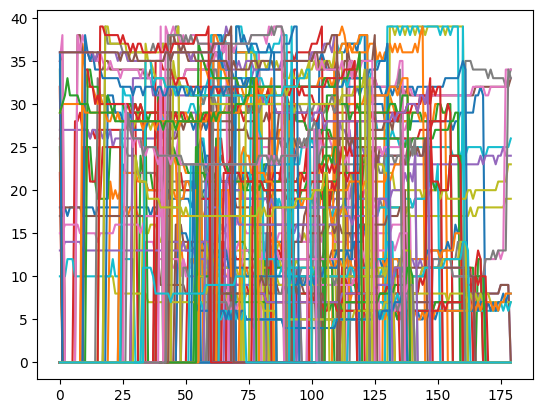

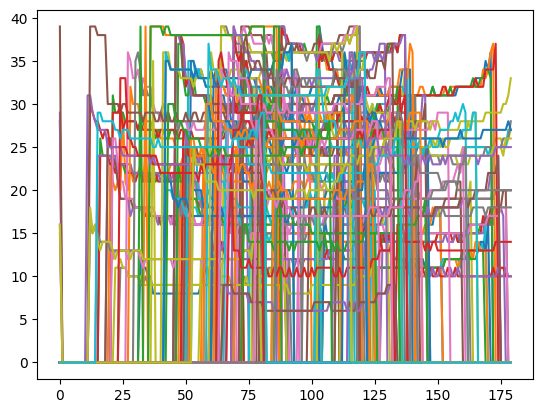

In [9]:
for i in range(df.shape[0]//2):
  df.iloc[i,:].plot()
plt.figure()
for i in range(df.shape[0]//2,df.shape[0]):
  df.iloc[i,:].plot()

In [10]:
df['class'] = 0
df.iloc[(data.shape[0]//2):,-1] = 1
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
295    1
296    1
297    1
298    1
299    1
Name: class, Length: 300, dtype: int64

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,class
0,18,18,18,17,18,18,18,18,18,18,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,29,0,0,0,0,28,28,29,27,...,0,0,0,0,0,0,0,0,0,0
4,27,27,27,27,27,27,27,27,27,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
297,0,0,0,0,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,1
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
x_train , y_train = df.iloc[:,:-1], df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.3,shuffle=True)

In [13]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
x_test.shape

(90, 180)

# Decsion tree

In [79]:
ens_class = DecisionTreeClassifier(max_depth=50, min_samples_leaf=5).fit(x_train,y_train)
ens_class = RandomForestClassifier(n_estimators=100, max_depth=80, min_samples_leaf=5).fit(x_train,y_train)

In [80]:
for i in range(y_test.shape[0]):
  print(ens_class.predict(x_test[i,:].reshape(1,-1)), y_test.iloc[i])

[1] 1
[1] 0
[1] 0
[1] 0
[1] 0
[0] 0
[1] 1
[0] 0
[0] 0
[0] 0
[1] 1
[0] 0
[1] 1
[0] 1
[1] 0
[0] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[0] 0
[1] 1
[0] 0
[0] 0
[1] 0
[0] 0
[0] 0
[1] 1
[0] 0
[1] 1
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[1] 0
[0] 0
[0] 0
[0] 0
[0] 0
[1] 1
[1] 1
[1] 0
[0] 0
[1] 0
[0] 0
[0] 0
[0] 0
[1] 1
[1] 1
[1] 1
[0] 0
[1] 1
[0] 0
[0] 0
[0] 0
[1] 1
[0] 0
[0] 0
[1] 1
[1] 1
[0] 0
[0] 1
[1] 1
[1] 1
[1] 1
[0] 0
[1] 0
[1] 0
[0] 0
[0] 0
[0] 0
[1] 1
[1] 0
[0] 0
[1] 1
[0] 1
[1] 1
[0] 0
[0] 0
[1] 1
[1] 0
[1] 1
[1] 1
[0] 0
[1] 1


In [81]:
preds = ens_class.predict(x_test)

In [82]:
acc = []
for i in range(len(y_test)):
  x = 0 if preds[i] < 0.5 else 1
  if x != y_test.iloc[i]:
    acc.append(0)
  else:
    acc.append(1)
np.sum(acc)/len(acc)

0.8222222222222222

In [83]:
!pip install micromlgen

In [84]:
from micromlgen import port

c_code = port(ens_class)
print(c_code)

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForest {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[2] = { 0 };
                        // tree #1
                        if (x[106] <= 0.05621103197336197) {
                            if (x[154] <= 0.7229472100734711) {
                                if (x[69] <= 0.9254954755306244) {
                                    if (x[73] <= -0.33369092643260956) {
                                        if (x[54] <= -0.062087275087833405) {
                                            votes[0] += 1;
                                        }

                                        else {
                                            votes[0] += 1;
                                        }
                     